In [209]:
import pandas as pd
from dateutil import parser

# 1. Cleaning Training Data
The code below cleans the NFL teams offensive and defensive regular season stats from the past 20 seasons obtained in "data-accumulation.ipynb", and combines them into one neat dataframe. Then, utilizing a dataframe containing the past 20 super bowl winners, the code marks which teams won the Super Bowl and which teams lost. Finally, the code adds in two columns, point differential (calculated by subtracting points allowed from points fielded), and turnover differential (calculated by subtracting offensive turnovers from defensive turnovers). These columns were added because they are usually correlated with successful postseason teams.

In [210]:
df_off = pd.read_csv("NFL-offense-training-data.csv")
df_def = pd.read_csv("NFL-defense-training-data.csv")

In [211]:
df_off = df_off.sort_values(by=['Tm', 'Year']).reset_index(drop=True)
df_off = df_off.add_prefix('off_')
df_def = df_def.sort_values(by=['Tm', 'Year']).reset_index(drop=True)
df_def = df_def.add_prefix('def_')

In [212]:
df_train = df_off.join(df_def)
df_train.head()

,off_Rank,off_Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,off_1stD,...,def_TD.1,def_Y/A,def_1stD.2,def_Pen,def_Yds.3,def_1stPy,def_Sc%,def_TO%,def_EXP,def_Year
0,28,Arizona Cardinals,16,262,4563,1003,4.5,35,13,274,...,17,4.4,117,111,969,22,36.4,12.3,-93.81,2002
1,31,Arizona Cardinals,16,225,4490,981,4.6,36,14,256,...,17,4.0,120,86,754,22,36.8,12.4,-2.10,2003
2,25,Arizona Cardinals,16,284,4550,1047,4.3,29,11,280,...,12,4.7,101,139,1121,28,27.1,14.8,162.40,2004
3,16,Arizona Cardinals,16,311,5575,1075,5.2,37,16,304,...,22,4.0,83,103,819,31,30.3,13.1,118.27,2005
4,18,Arizona Cardinals,16,314,5000,999,5.0,30,13,298,...,16,4.1,114,95,815,31,37.6,18.2,148.96,2006


In [213]:
df_train = df_train.drop(columns=['def_Tm', 'def_Year'])
df_train = df_train.rename(columns={'off_Year' : 'Year', 'off_Tm': 'Tm'})

In [214]:
df_train['Super_Bowl_Win'] = 0
df_train.head()

,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,off_1stD,...,def_TD.1,def_Y/A,def_1stD.2,def_Pen,def_Yds.3,def_1stPy,def_Sc%,def_TO%,def_EXP,Super_Bowl_Win
0,28,Arizona Cardinals,16,262,4563,1003,4.5,35,13,274,...,17,4.4,117,111,969,22,36.4,12.3,-93.81,0
1,31,Arizona Cardinals,16,225,4490,981,4.6,36,14,256,...,17,4.0,120,86,754,22,36.8,12.4,-2.10,0
2,25,Arizona Cardinals,16,284,4550,1047,4.3,29,11,280,...,12,4.7,101,139,1121,28,27.1,14.8,162.40,0
3,16,Arizona Cardinals,16,311,5575,1075,5.2,37,16,304,...,22,4.0,83,103,819,31,30.3,13.1,118.27,0
4,18,Arizona Cardinals,16,314,5000,999,5.0,30,13,298,...,16,4.1,114,95,815,31,37.6,18.2,148.96,0


In [215]:
df_super_bowl_winners = pd.read_csv("super-bowl-winners.csv")
df_super_bowl_winners.head()

,Date,SB,Winner,Pts,Loser,Pts.1,MVP,Stadium,City,State
0,Feb 13 2022,LVI (56),Los Angeles Rams,23,Cincinnati Bengals,20,Cooper Kupp,SoFi Stadium,Inglewood,California
1,Feb 7 2021,LV (55),Tampa Bay Buccaneers,31,Kansas City Chiefs,9,Tom Brady,Raymond James Stadium,Tampa,Florida
2,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
3,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
4,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota


In [216]:
for j in range(len(df_super_bowl_winners)):
    for i in range(len(df_train)):
        if(df_train.iloc[i]['Tm'] == df_super_bowl_winners.iloc[j]['Winner']):
            local_year = parser.parse(df_super_bowl_winners.iloc[j]['Date']).year - 1
            if(local_year == df_train.iloc[i]['Year']):
                df_train.at[i, 'Super_Bowl_Win'] = 1
                break

In [217]:
temp_column = df_train.pop('Super_Bowl_Win')
df_train.insert(0, 'Super_Bowl_Win', temp_column)

In [218]:
df_train.head()

,Super_Bowl_Win,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,...,def_Yds.2,def_TD.1,def_Y/A,def_1stD.2,def_Pen,def_Yds.3,def_1stPy,def_Sc%,def_TO%,def_EXP
0,0,28,Arizona Cardinals,16,262,4563,1003,4.5,35,13,...,2146,17,4.4,117,111,969,22,36.4,12.3,-93.81
1,0,31,Arizona Cardinals,16,225,4490,981,4.6,36,14,...,1915,17,4.0,120,86,754,22,36.8,12.4,-2.10
2,0,25,Arizona Cardinals,16,284,4550,1047,4.3,29,11,...,2105,12,4.7,101,139,1121,28,27.1,14.8,162.40
3,0,16,Arizona Cardinals,16,311,5575,1075,5.2,37,16,...,1632,22,4.0,83,103,819,31,30.3,13.1,118.27
4,0,18,Arizona Cardinals,16,314,5000,999,5.0,30,13,...,1897,16,4.1,114,95,815,31,37.6,18.2,148.96


In [219]:
df_train['Point_Dif'] = df_train['off_PF'] - df_train['def_PA']
df_train['TO_Dif'] = df_train['def_TO'] - df_train['off_TO']

# 2. Looking at correlation between winning a Super Bowl and team regular season stats
To decide which indepndent variables to use for the logistic regression model, I utilized a correlation matrix, shown below. The top team statistics that were correlated with a Super Bowl Win were Point Differential, Defensive Points Allowed, Defensive Net Yards Allowed, Defensive Interceptions, Defensive Rank, and Turnover Differential. 
The one in ten rule states that regression models should implement only one feature for every ten events. Since the data provides 20 super bowl wins, the logistic model should then utilize two features. I decided these features to be the team's point differential and the team's turnover differential, as these two categories seemed the most relevant to predicting a successful playoff team based on my knowledge of the sport. 

In [220]:
abs(df_train.corr(numeric_only=True)).sort_values('Super_Bowl_Win', ascending=False)

,Super_Bowl_Win,off_Rank,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,off_1stD,...,def_Y/A,def_1stD.2,def_Pen,def_Yds.3,def_1stPy,def_Sc%,def_TO%,def_EXP,Point_Dif,TO_Dif
Super_Bowl_Win,1.000000e+00,1.575640e-01,1.019813e-15,0.149143,0.092553,0.045012,0.094369,0.095980,0.049885,0.087097,...,0.060161,0.072692,0.007465,0.011707,0.019696,0.148506,0.136766,0.142247,2.114952e-01,1.590873e-01
Point_Dif,2.114952e-01,8.321341e-01,1.579470e-15,0.821145,0.595277,0.304776,0.577869,0.511514,0.306567,0.564238,...,0.157093,0.482474,0.023367,0.024991,0.015982,0.584468,0.515994,0.358837,1.000000e+00,6.885445e-01
def_PA,1.809187e-01,2.803925e-01,1.322987e-01,0.185236,0.002899,0.003319,0.007318,0.295279,0.124741,0.001375,...,0.401910,0.564786,0.029749,0.028891,0.159130,0.872837,0.455348,0.691751,7.129487e-01,5.199144e-01
def_NY/A,1.716534e-01,1.994346e-01,8.840595e-03,0.130664,0.046556,0.067650,0.086619,0.034703,0.053734,0.056180,...,0.322339,0.379268,0.008063,0.036164,0.050390,0.747359,0.332021,0.650085,5.317531e-01,2.848724e-01
def_Int,1.644290e-01,3.414697e-01,5.358378e-02,0.273629,0.015325,0.008513,0.022432,0.103670,0.027717,0.025133,...,0.110087,0.210684,0.002003,0.044469,0.126946,0.517054,0.837182,0.469885,4.546650e-01,6.549206e-01
def_Rank,1.624271e-01,2.950330e-01,2.788411e-15,0.271419,0.109385,0.095075,0.090143,0.406701,0.226544,0.123889,...,0.347730,0.527438,0.000243,0.021122,0.086215,0.765584,0.369899,0.491695,7.330024e-01,5.292925e-01
TO_Dif,1.590873e-01,5.657672e-01,2.754389e-15,0.541778,0.256220,0.045645,0.294488,0.728102,0.502158,0.222042,...,0.011576,0.220473,0.024958,0.019539,0.011585,0.422342,0.747362,0.252884,6.885445e-01,1.000000e+00
off_Rank,1.575640e-01,1.000000e+00,2.211178e-16,0.937953,0.757139,0.363709,0.745214,0.414014,0.263995,0.695936,...,0.061884,0.262056,0.033688,0.061013,0.024387,0.227283,0.439062,0.116606,8.321341e-01,5.657672e-01
off_PF,1.491426e-01,9.379527e-01,1.076779e-01,1.000000,0.831871,0.424416,0.803877,0.476515,0.328100,0.791850,...,0.106962,0.216467,0.008534,0.058537,0.107118,0.108680,0.352514,0.060137,8.211450e-01,5.417776e-01
def_Y/P,1.489668e-01,3.595602e-02,4.554577e-02,0.051037,0.206861,0.010478,0.244614,0.095352,0.141026,0.214605,...,0.632876,0.462501,0.016182,0.062679,0.048019,0.753660,0.258954,0.717991,3.859875e-01,1.549926e-01


# In Depth Look at Reasoning Behind Logistic Regression
Before continuing with the creation of the prediction model, I wanted to demonstrate the reasoning behind the utilizing  logistic regression as our predictive model. First of all, winning the Super Bowl is a binary event: a team will either win it or not win it in any given year. Secondly, our two main features, point differential and turnover differential both show a relatively strong correlation with a potential logistic model, as higher differentials are more likely to jump into winning the Super Bowl.

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

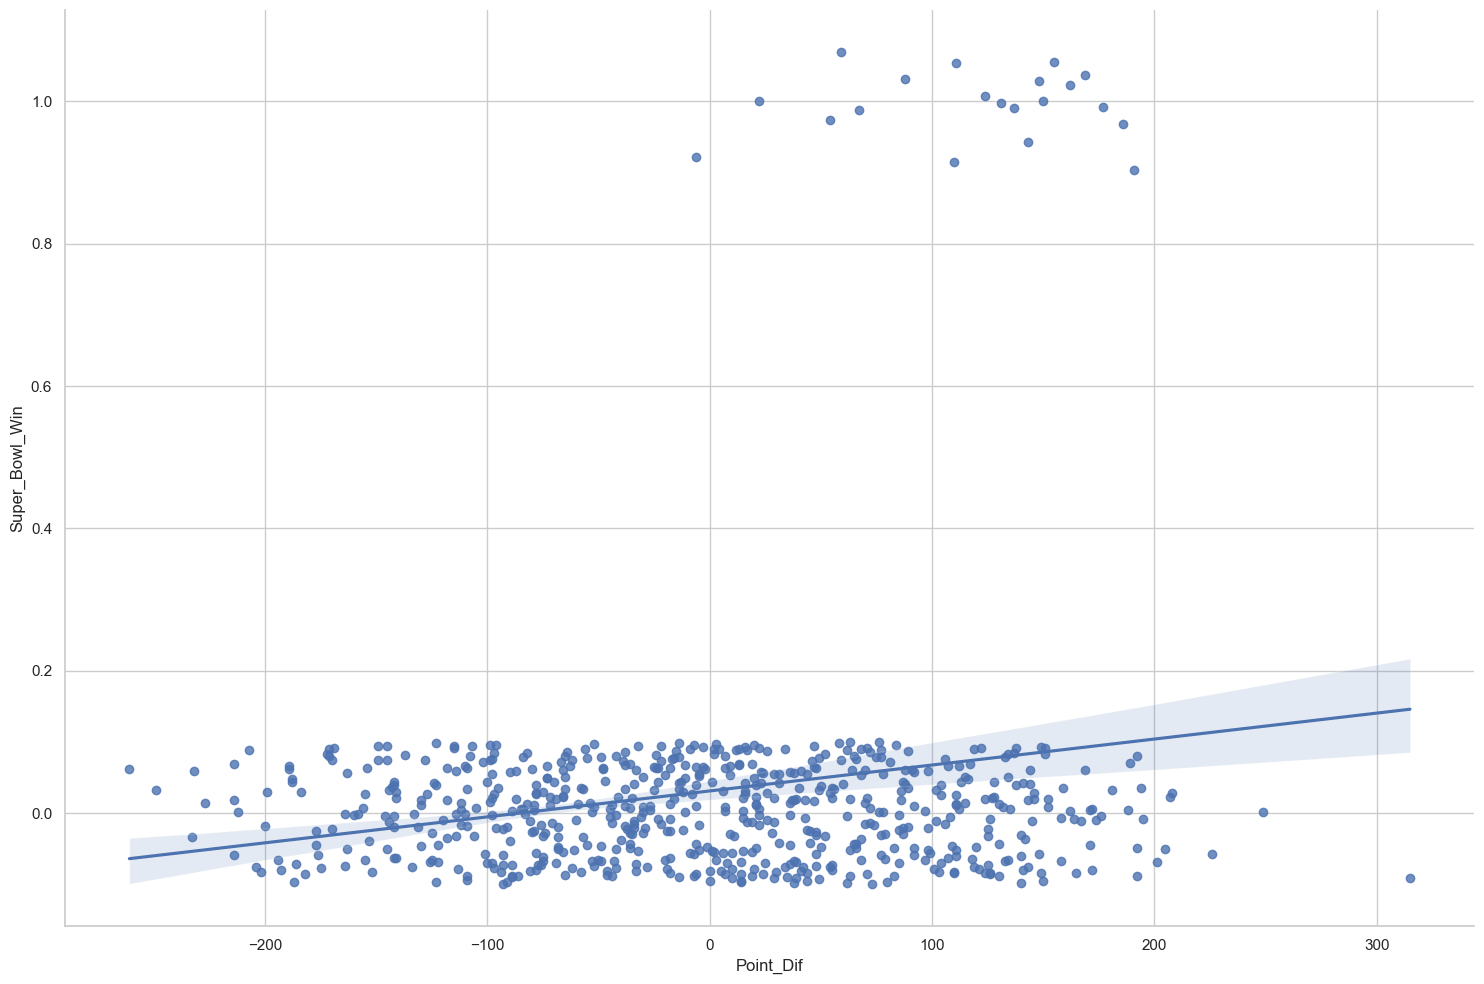

In [222]:
sns.set(style = 'whitegrid')
sns.lmplot(x = 'Point_Dif', y = 'Super_Bowl_Win', data = df_train, height = 10, aspect = 1.5, y_jitter = 0.1)

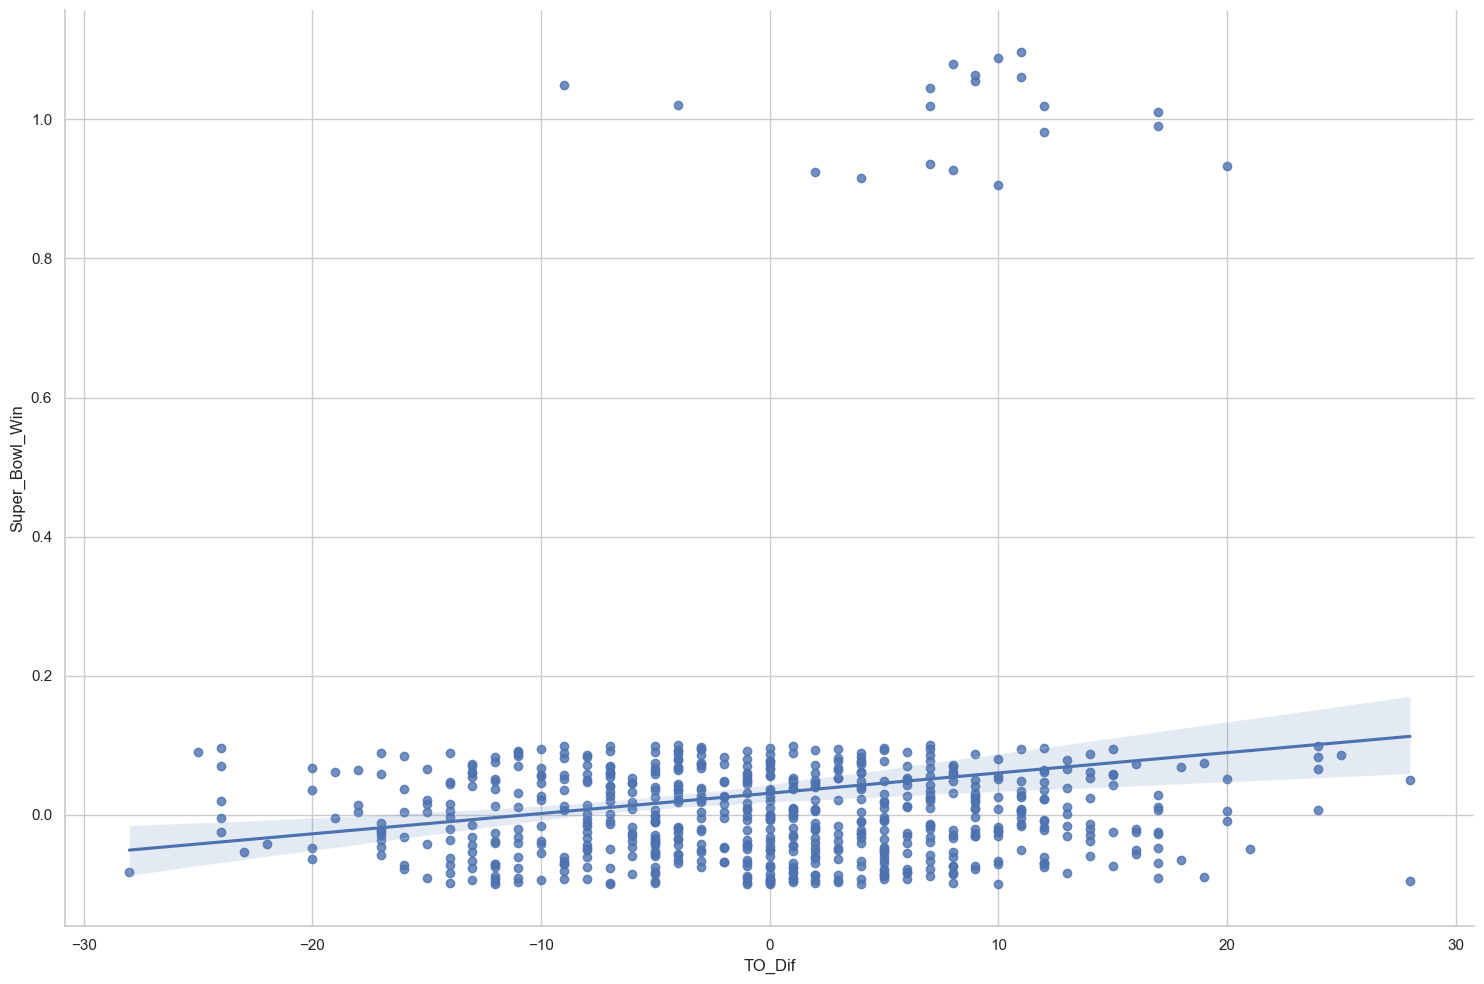

In [244]:
sns.lmplot(x = 'TO_Dif', y = 'Super_Bowl_Win', data = df_train, height = 10, aspect = 1.5, y_jitter = 0.1)

# 3. Training the Logistic Regression Model
The following code utilizes sklearn's Logistic Regression model and trains the model using Point Differential and Turnover Differential as the indepndent variables and Super Bowl Win as the dependent variable. Additionally, it utilizes a training and testing data split of 0.2. 

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [297]:
x1 = np.array(df_train['Point_Dif'])
x2 = np.array(df_train['TO_Dif'])
y = np.array(df_train['Super_Bowl_Win'])
x1 = preprocessing.scale(x1)
x2 = preprocessing.scale(x2)
df_train['Standardized_Point_Dif'] = x1
df_train['Standardized_TO_Dif'] = x2

In [298]:
X = df_train[['Standardized_Point_Dif', 'Standardized_TO_Dif']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = LogisticRegression(max_iter = 5000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

# 4. Testing the logistic model
Utilizing the test data produced from sklearn's model selection, the code below displays the y_test data (which indicates whether a team actually won the Super Bowl that year), the y_predict data (which outright predicts whether a team will win the Super Bowl or not), and lose/win probability (showing the team's independent chances of losing/winning the Super Bowl). 
The testing results display that while the model cannot outright predict if a team will certainly win the Super Bowl or not, it is relatively accurate at predicting teams with a high chance of winning the Super Bowl, as three of the top ten Super Bowl win probabilities were from teams that actually won the Super Bowl.

Additionally, when utilizing the model to predict the results of all teams in the past 20 years, the model is also fairly accurate. After adding a column which ranks teams from each season based on the win probability and taking the mean of their season ranking, we see that on average Super Bowl winning teams were ranked to have the 5th/6th best odds to win the Super Bowl in any given year.

In [299]:
df_test = pd.DataFrame(x_test, columns=['x_test'])
df_test['y_test'] = y_test
df_test['y_predict'] = clf.predict(x_test)
df_test[['lose_probability', 'win_probability']] = clf.predict_proba(x_test)
df_test

,x_test,y_test,y_predict,lose_probability,win_probability
343,NaN,0,0,0.990159,0.009841
574,NaN,0,0,0.988397,0.011603
611,NaN,0,0,0.986792,0.013208
386,NaN,0,0,0.908123,0.091877
104,NaN,0,0,0.883497,0.116503
...,...,...,...,...,...
0,NaN,0,0,0.997582,0.002418
288,NaN,0,0,0.994051,0.005949
190,NaN,0,0,0.877509,0.122491
181,NaN,0,0,0.963706,0.036294


In [300]:
df_test.sort_values('win_probability', ascending=False).head(10)

,x_test,y_test,y_predict,lose_probability,win_probability
229,NaN,0,0,0.802842,0.197158
227,NaN,0,0,0.860392,0.139608
549,NaN,0,0,0.868532,0.131468
190,NaN,0,0,0.877509,0.122491
400,NaN,1,0,0.881204,0.118796
104,NaN,0,0,0.883497,0.116503
486,NaN,1,0,0.889169,0.110831
543,NaN,0,0,0.894148,0.105852
516,NaN,0,0,0.902185,0.097815
228,NaN,1,0,0.905307,0.094693


In [301]:
df_test[df_test.y_test == 1]

,x_test,y_test,y_predict,lose_probability,win_probability
400,NaN,1,0,0.881204,0.118796
389,NaN,1,0,0.935356,0.064644
486,NaN,1,0,0.889169,0.110831
228,NaN,1,0,0.905307,0.094693


In [302]:
df_train[['Lose_Probability', 'Win_Probability']] = clf.predict_proba(X)
df_train

,Super_Bowl_Win,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,...,def_1stPy,def_Sc%,def_TO%,def_EXP,Point_Dif,TO_Dif,Standardized_Point_Dif,Standardized_TO_Dif,Lose_Probability,Win_Probability
378,0,0,New England Patriots,16,589,6580,1058,6.2,15,6,...,15,24.0,16.6,125.67,315,16,3.119680,1.687163,0.568537,0.431463
383,0,0,New England Patriots,16,557,6846,1191,5.7,16,7,...,33,30.1,20.4,83.26,226,25,2.238246,2.636193,0.751307,0.248693
381,0,0,New England Patriots,16,518,5820,986,5.9,10,5,...,23,30.7,21.0,71.86,205,28,2.030268,2.952536,0.783316,0.216684
57,0,0,Baltimore Ravens,16,531,6521,1064,6.1,15,7,...,39,32.5,14.5,21.61,249,10,2.466033,1.054477,0.755184,0.244816
229,0,0,Green Bay Packers,16,560,6482,988,6.6,14,6,...,16,33.9,20.2,52.98,201,24,1.990653,2.530745,0.802842,0.197158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,31,Arizona Cardinals,16,225,4490,981,4.6,36,14,...,22,36.8,12.4,-2.10,-227,-13,-2.248150,-1.370820,0.998978,0.001022
206,0,26,Detroit Lions,16,268,4292,913,4.7,29,10,...,15,45.3,8.4,-110.28,-249,-9,-2.466033,-0.949029,0.999139,0.000861
310,0,31,Kansas City Chiefs,16,211,5108,1015,5.0,37,17,...,19,40.4,6.2,-16.83,-214,-24,-2.119401,-2.530745,0.999036,0.000964
207,0,26,Detroit Lions,16,262,4784,1037,4.6,41,9,...,24,43.8,10.4,29.66,-232,-18,-2.297669,-1.898059,0.999119,0.000881


In [317]:
df_train = df_train.sort_values(by=['Year', 'Win_Probability'], ascending=False).reset_index()
df_train['Season_Prediction_Ranking'] = 0
for i in range(20):
    for j in range(32):
        index = j  + 32 * (i)
        df_train.at[index, 'Season_Prediction_Ranking'] = j + 1
df_train
        

,level_0,index,Super_Bowl_Win,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,...,def_Sc%,def_TO%,def_EXP,Point_Dif,TO_Dif,Standardized_Point_Dif,Standardized_TO_Dif,Lose_Probability,Win_Probability,Season_Prediction_Ranking
0,0,79,0,2,Buffalo Bills,17,483,6493,1143,5.7,...,28.0,14.5,36.13,194,8,1.921327,0.843582,0.855644,0.144356,1
1,1,179,0,0,Dallas Cowboys,17,530,6919,1153,6.0,...,32.5,16.7,21.81,172,14,1.703444,1.476268,0.871534,0.128466,2
2,2,599,0,1,Tampa Bay Buccaneers,17,511,6901,1139,6.1,...,33.5,14.7,-0.60,158,10,1.564792,1.054477,0.895261,0.104739,3
3,3,392,0,5,New England Patriots,17,462,6008,1052,5.7,...,29.4,16.9,-4.84,159,7,1.574696,0.738134,0.899360,0.100640,4
4,4,319,0,3,Kansas City Chiefs,17,480,6746,1134,5.9,...,37.3,16.0,-131.68,116,4,1.148834,0.421791,0.938625,0.061375,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,635,160,0,30,Dallas Cowboys,16,217,4375,948,4.6,...,28.2,13.9,76.24,-112,-4,-1.109219,-0.421791,0.995634,0.004366,28
636,636,240,0,31,Houston Texans,16,213,3572,947,3.8,...,29.0,8.6,34.65,-143,-8,-1.416236,-0.843582,0.997131,0.002869,29
637,637,200,0,25,Detroit Lions,16,306,4471,955,4.7,...,37.1,11.4,-61.93,-145,-7,-1.436043,-0.738134,0.997142,0.002858,30
638,638,0,0,28,Arizona Cardinals,16,262,4563,1003,4.5,...,36.4,12.3,-93.81,-155,-10,-1.535081,-1.054477,0.997582,0.002418,31


In [324]:
print(df_train[df_train['Super_Bowl_Win'] == 1]['Season_Prediction_Ranking'].mean())

5.5


# 5. Cleaning up prediction data
Similar to the training data, the code below combined the 2022 NFL regular season offensive and defensive stats into one neat dataframe. The code also adds in the point and turnover differential columns essential to utilizing the logistic regression model. Finally, to account for the canceled game between the Buffalo Bills and Cincinnati Bengals, I utilized the BetMGM game line of -2.5 to add a +3 point differential to the Bills and -3 point differential to the Bengals. 

In [362]:
df_2022_off = pd.read_csv("NFL-offense-testing-data.csv")[0:32]
df_2022_def = pd.read_csv("NFL-defense-testing-data.csv")[0:32]

In [363]:
df_2022_off = df_2022_off.sort_values(by=['Tm']).reset_index(drop=True)
df_2022_off = df_2022_off.add_prefix('off_')
df_2022_def = df_2022_def.sort_values(by=['Tm']).reset_index(drop=True)
df_2022_def = df_2022_def.add_prefix('def_')

In [364]:
df_predict = df_2022_off.join(df_2022_def)
df_predict = df_predict.drop(columns=['def_Tm'])
df_predict = df_predict.rename(columns={'off_Tm': 'Tm'})

In [365]:
df_predict['Point_Dif'] = df_predict['off_PF'] - df_predict['def_PA']
df_predict['TO_Dif'] = df_predict['def_TO'] - df_predict['off_TO']

In [366]:
df_predict.at[3, 'Point_Dif'] = df_predict.at[3, 'Point_Dif'] + 3
df_predict.at[6, 'Point_Dif'] = df_predict.at[6, 'Point_Dif'] - 3

In [367]:
df_predict

,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,off_1stD,...,def_Y/A,def_1stD.2,def_Pen,def_Yds.3,def_1stPy,def_Sc%,def_TO%,def_EXP,Point_Dif,TO_Dif
0,20,Arizona Cardinals,17.0,340.0,5499.0,1144.0,4.8,25.0,8.0,326.0,...,4.5,124.0,94.0,757.0,21.0,41.6,10.5,-81.73,-109.0,-5.0
1,14,Atlanta Falcons,17.0,365.0,5417.0,1011.0,5.4,21.0,12.0,330.0,...,4.4,136.0,100.0,804.0,15.0,43.5,10.0,-123.50,-21.0,-4.0
2,18,Baltimore Ravens,17.0,350.0,5760.0,1052.0,5.5,21.0,8.0,337.0,...,3.9,91.0,79.0,650.0,26.0,35.8,13.9,-31.68,35.0,4.0
3,3,Buffalo Bills,16.0,455.0,6361.0,1037.0,6.1,27.0,13.0,367.0,...,4.3,103.0,89.0,754.0,29.0,31.0,14.3,10.93,172.0,0.0
4,19,Carolina Panthers,17.0,347.0,5206.0,976.0,5.3,21.0,8.0,281.0,...,4.3,125.0,105.0,866.0,27.0,34.2,8.3,-52.04,-27.0,-4.0
5,22,Chicago Bears,17.0,326.0,5233.0,993.0,5.3,25.0,10.0,278.0,...,4.9,151.0,84.0,652.0,26.0,41.8,11.9,-169.13,-137.0,-2.0
6,7,Cincinnati Bengals,16.0,418.0,5768.0,1053.0,5.5,18.0,6.0,357.0,...,4.2,102.0,100.0,832.0,20.0,36.4,13.1,-9.41,93.0,6.0
7,17,Cleveland Browns,17.0,361.0,5934.0,1116.0,5.3,21.0,9.0,350.0,...,4.7,129.0,88.0,714.0,34.0,38.5,10.2,-57.92,-20.0,-1.0
8,2,Dallas Cowboys,17.0,467.0,6034.0,1114.0,5.4,23.0,5.0,347.0,...,4.4,119.0,98.0,851.0,34.0,33.5,16.2,36.12,125.0,10.0
9,31,Denver Broncos,17.0,287.0,5527.0,1078.0,5.1,24.0,9.0,300.0,...,4.3,109.0,106.0,922.0,35.0,35.9,10.6,7.24,-72.0,-1.0


# 6. Predicting the 2022-2023 NFL Super Bowl Winner
The code below standardized the 2022-23 regular season point and turnover differentials and plugged it into the logistic regression model developed earlier. The model predicts that the teams with the highest chance of winning this year's super bowl are the San Francisco 49ers, Buffalo Bills, Philadelphia Eagles, Dallas Cowboys, and Kansas City Chiefs. 

In [368]:
x1_predict = np.array(df_predict['Point_Dif'])
x2_predict = np.array(df_predict['TO_Dif'])
x1_predict = preprocessing.scale(x1_predict)
x2_predict = preprocessing.scale(x2_predict)
df_predict['Standardized_Point_Dif'] = x1_predict
df_predict['Standardized_TO_Dif'] = x2_predict

In [370]:
X_predict = df_predict[['Standardized_Point_Dif', 'Standardized_TO_Dif']]

In [376]:
df_predict[['Lose_Probability', 'Win_Probability']] = clf.predict_proba(X_predict)
df_predict = df_predict.sort_values(by=['Win_Probability'], ascending=False).reset_index()
df_predict

,index,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,...,def_1stPy,def_Sc%,def_TO%,def_EXP,Point_Dif,TO_Dif,Standardized_Point_Dif,Standardized_TO_Dif,Lose_Probability,Win_Probability
0,27,5,San Francisco 49ers,17.0,450.0,6216.0,1047.0,5.9,17.0,8.0,...,26.0,25.7,15.3,68.11,173.0,13.0,2.129422,2.183795,0.787229,0.212771
1,3,3,Buffalo Bills,16.0,455.0,6361.0,1037.0,6.1,27.0,13.0,...,29.0,31.0,14.3,10.93,172.0,0.0,2.117114,0.000000,0.846405,0.153595
2,25,1,Philadelphia Eagles,17.0,477.0,6614.0,1124.0,5.9,19.0,10.0,...,24.0,32.4,15.1,15.10,133.0,8.0,1.637070,1.343874,0.882151,0.117849
3,8,2,Dallas Cowboys,17.0,467.0,6034.0,1114.0,5.4,23.0,5.0,...,34.0,33.5,16.2,36.12,125.0,10.0,1.538600,1.679842,0.887471,0.112529
4,15,0,Kansas City Chiefs,17.0,496.0,7032.0,1094.0,6.4,23.0,11.0,...,28.0,35.9,10.3,-40.58,127.0,-3.0,1.563218,-0.503953,0.918473,0.081527
5,6,7,Cincinnati Bengals,16.0,418.0,5768.0,1053.0,5.5,18.0,6.0,...,20.0,36.4,13.1,-9.41,93.0,6.0,1.144718,1.007905,0.932698,0.067302
6,14,9,Jacksonville Jaguars,17.0,404.0,6075.0,1072.0,5.7,22.0,13.0,...,25.0,36.1,14.4,-35.25,54.0,5.0,0.664675,0.839921,0.960884,0.039116
7,2,18,Baltimore Ravens,17.0,350.0,5760.0,1052.0,5.5,21.0,8.0,...,26.0,35.8,13.9,-31.68,35.0,4.0,0.430808,0.671937,0.970556,0.029444
8,10,4,Detroit Lions,17.0,453.0,6460.0,1092.0,5.9,15.0,8.0,...,33.0,41.2,11.9,-159.66,26.0,7.0,0.320029,1.175889,0.971583,0.028417
9,21,16,New England Patriots,17.0,364.0,5348.0,1006.0,5.3,23.0,9.0,...,30.0,30.5,14.2,55.35,17.0,7.0,0.209250,1.175889,0.974845,0.025155


In [380]:
final_prediction = df_predict[['Tm', 'Point_Dif', 'TO_Dif', 'Standardized_Point_Dif', 'Standardized_TO_Dif', 
    'Lose_Probability', 'Win_Probability']]

In [381]:
final_prediction

,Tm,Point_Dif,TO_Dif,Standardized_Point_Dif,Standardized_TO_Dif,Lose_Probability,Win_Probability
0,San Francisco 49ers,173.0,13.0,2.129422,2.183795,0.787229,0.212771
1,Buffalo Bills,172.0,0.0,2.117114,0.000000,0.846405,0.153595
2,Philadelphia Eagles,133.0,8.0,1.637070,1.343874,0.882151,0.117849
3,Dallas Cowboys,125.0,10.0,1.538600,1.679842,0.887471,0.112529
4,Kansas City Chiefs,127.0,-3.0,1.563218,-0.503953,0.918473,0.081527
5,Cincinnati Bengals,93.0,6.0,1.144718,1.007905,0.932698,0.067302
6,Jacksonville Jaguars,54.0,5.0,0.664675,0.839921,0.960884,0.039116
7,Baltimore Ravens,35.0,4.0,0.430808,0.671937,0.970556,0.029444
8,Detroit Lions,26.0,7.0,0.320029,1.175889,0.971583,0.028417
9,New England Patriots,17.0,7.0,0.209250,1.175889,0.974845,0.025155


# 7. Analyzing results and reflecting on the project
Overall, I'm quite satisfied with the results of the model. My personal picks to win the Super Bowl in order are 1. Chiefs, 2. Bills, 3. 49ers, 4. Eagles. All 4 of these teams landed in the top 5 of the model's prediction. Additionally, the model had twelve playoff teams ranked in the top fourteen, with the Dolphins being just outside ranked at 15 (likely due to their QB injury issues), and the Buccaneers being ranked at 24 (likely because they won a historicaly weak division). Additionally, the two non-playoff teams in the top 14, the Patriots and Lions, were both eliminated from the playoffs in Week 18, meaning they were borderline playoff teams as well.  The model's accuracy in predicting regular season teams makes me confident that it will remain accurate at predicting playoff winning teams as well.

Utilizing the model's rankings to predict the playoffs, the bracket will go something like this

Wild Card: 

NFC - 49ers beat Seahawks, Vikings beat Giants, Cowboys beat Buccaneers

AFC - Bills beat Dolphins, Bengals beat Ravens, Jaguars beat Chargers

Divisional Round:

NFC - Eagles beat Cowboys, 49ers beat Vikings

AFC - Chiefs beat Jaguars, Bills beat Bengals

Championship Round:

NFC - Bills beat Chiefs

AFC - 49ers beat Eagles

Super Bowl: 49ers beat Bills


Of course, this model comes with a lot of limitations. First of all, it provides win probabilities indepndent of other teams in the same year. Additionally, it fails to account for home-field advantage, which is a huge factor in playoff success. It also doesn't account for any special teams play, which can occasionally turn the tide in a close game. Finally, it doesn't account for team momentum, or other external factors such as the Damar Hamlin injury being a huge motivator for the Bills. However, it still appears to be a good way to predict playoff teams, and it remains to be seen how accurate it will be at predicting playoff success. 

In [382]:
final_prediction.to_csv("2022-2023-Final-Super-Bowl-Prediction.csv")